# Preliminary Cluster Analysis

Steps
1. Data Inspection
2. Standardization
3. Kmeans
[# Cluster Selection](https://towardsdatascience.com/elbow-method-is-not-sufficient-to-find-best-k-in-k-means-clustering-fc820da0631d#:~:text=The%20elbow%20method%20is%20a,cluster%20and%20the%20cluster%20centroid.)
4. Cluster Visualization

In [1]:
import pandas as pd
df = pd.read_csv("sampleData.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                616 non-null    int64  
 1   id                        616 non-null    float64
 2   length                    616 non-null    float64
 3   cost/km (millions)        616 non-null    float64
 4   cheap?                    616 non-null    float64
 5   clength                   616 non-null    float64
 6   ctunnel                   616 non-null    float64
 7   anglo?                    616 non-null    float64
 8   inflation index           616 non-null    float64
 9   real cost (2021 dollars)  616 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 48.2 KB


In [2]:
df.columns

Index(['Unnamed: 0', 'id', 'length', 'cost/km (millions)', 'cheap?', 'clength',
       'ctunnel', 'anglo?', 'inflation index', 'real cost (2021 dollars)'],
      dtype='object')

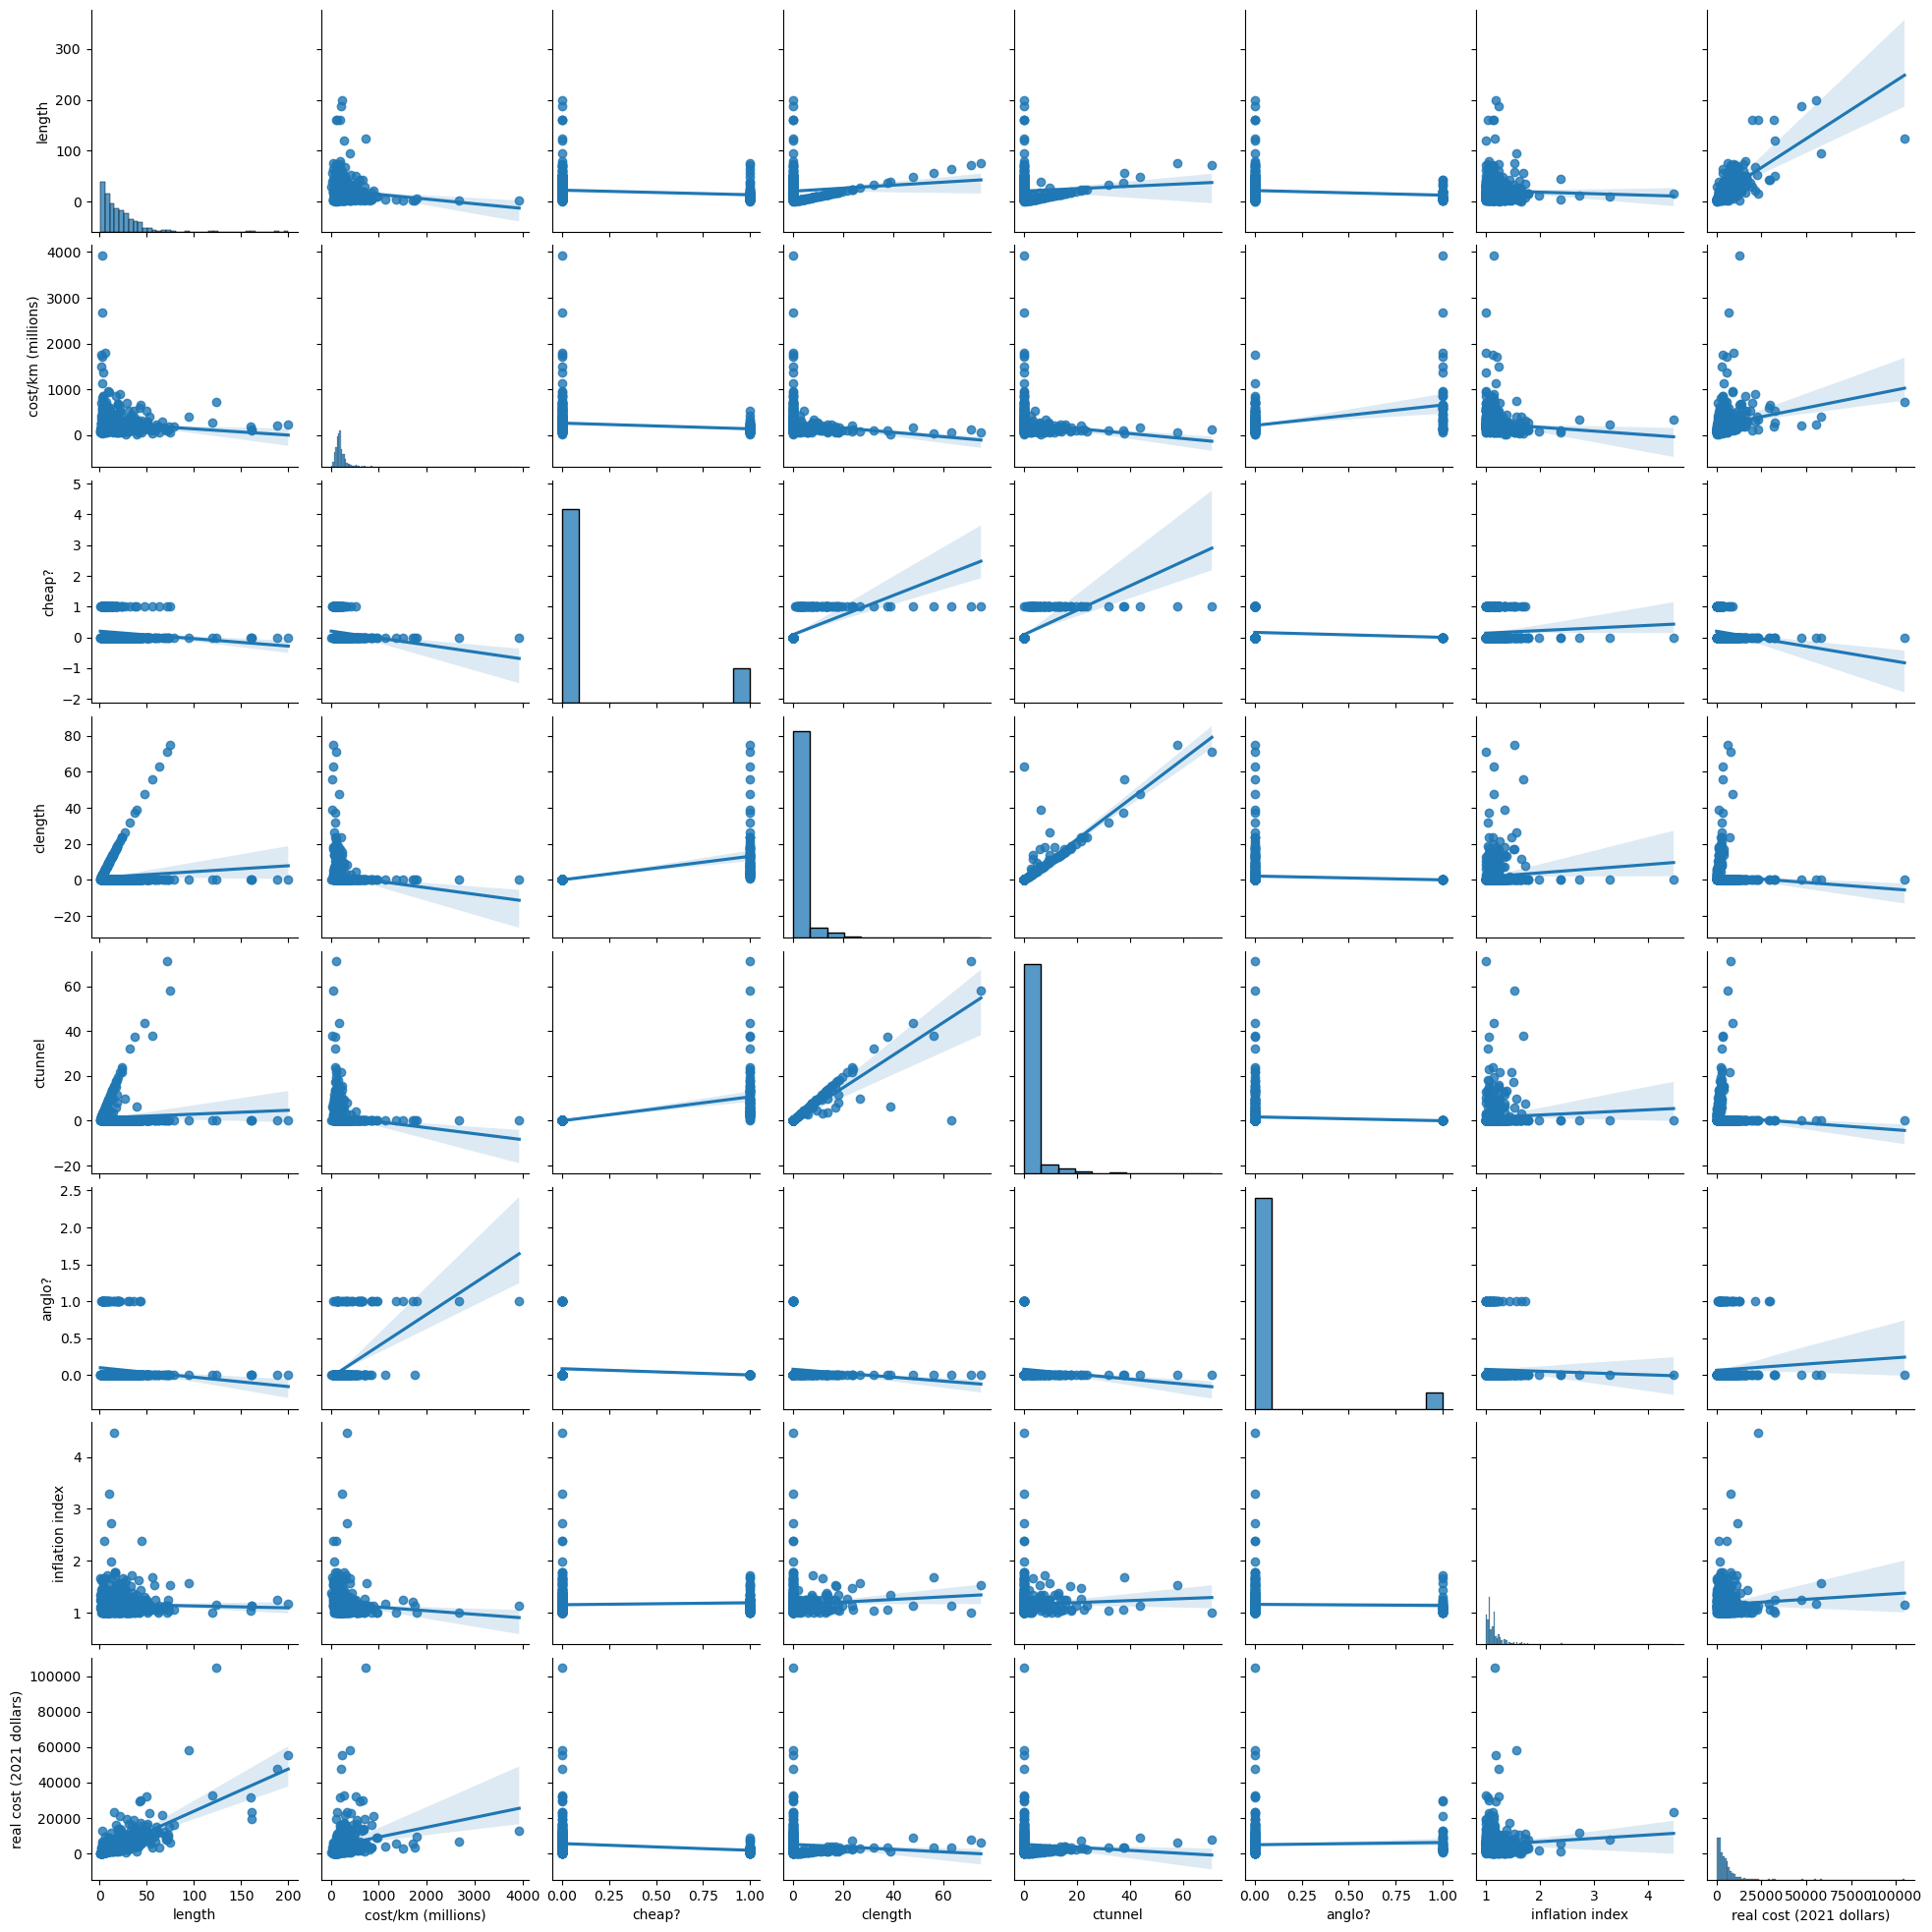

In [3]:
import seaborn as sns
# get a list of all the columns with 'pc' in the name
cols_to_plot = ['length', 'cost/km (millions)', 'cheap?', 'clength','ctunnel', 'anglo?', 'inflation index', 'real cost (2021 dollars)']


# kind='reg' adds the line of best fit
ax = sns.pairplot(df[cols_to_plot], kind='reg')  

## Standardizing


In [4]:
from sklearn import preprocessing

# normalizing
scaler = preprocessing.StandardScaler().fit(df[cols_to_plot])

df_to_cluster = pd.DataFrame(scaler.transform(df[cols_to_plot]), 
                         columns=cols_to_plot, index=df.index) 

df.describe()

,Unnamed: 0,id,length,cost/km (millions),cheap?,clength,ctunnel,anglo?,inflation index,real cost (2021 dollars)
count,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000
mean,313.548701,7984.186688,20.770943,241.641577,0.149351,1.957094,1.592727,0.071429,1.162738,4998.169278
std,183.826219,845.742508,21.753043,263.903316,0.356723,7.236358,5.851760,0.257749,0.237831,7019.585967
min,0.000000,7136.000000,0.700000,7.793145,0.000000,0.000000,0.000000,0.000000,1.000000,79.802093
25%,153.750000,7441.750000,6.500000,133.946804,0.000000,0.000000,0.000000,0.000000,1.059897,1483.057273
50%,314.500000,7762.500000,15.400000,185.826426,0.000000,0.000000,0.000000,0.000000,1.105459,3380.009336
75%,469.250000,8074.250000,28.225000,255.420572,0.000000,0.000000,0.000000,0.000000,1.180214,6057.313755
max,636.000000,11270.000000,200.000000,3928.571429,1.000000,75.000000,71.000000,1.000000,4.471452,104685.843310


## Clustering

In [5]:
# standardize
from sklearn.cluster import KMeans
df_to_cluster = df_to_cluster.dropna()

# cluster
kmeans = KMeans(n_clusters=5, random_state=1).fit(df_to_cluster)
df_to_cluster['cluster_id'] = kmeans.labels_

# verify that we got the same result as before
df_to_cluster.groupby('cluster_id').size()

/Users/chaithra/opt/anaconda3/envs/uds/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster_id
0      8
1     45
2      7
3    471
4     85
dtype: int64

## Optimal Cluster Numbers

/Users/chaithra/opt/anaconda3/envs/uds/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/chaithra/opt/anaconda3/envs/uds/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/chaithra/opt/anaconda3/envs/uds/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/chaithra/opt/anaconda3/envs/uds/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicit

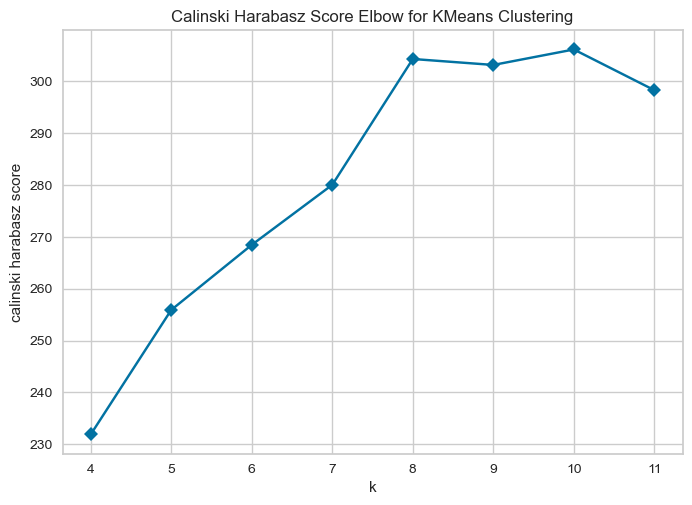

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [31]:
#install yellowbrick to vizualize the Elbow curve
# !pip install yellowbrick  
# https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

from yellowbrick.cluster import KElbowVisualizer


# Instantiate the clustering model and visualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,20))

model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(4,12), metric='calinski_harabasz', timings=False, locate_elbow=False
)
 
visualizer.fit(df_to_cluster)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [32]:
# Gap Statistic

import numpy as np
import matplotlib.pyplot as plt
def optimalK(data, nrefs=3, maxClusters=15):
    """
    Calculates KMeans optimal K using Gap Statistic 
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
# Holder for reference dispersion results
        refDisps = np.zeros(nrefs)
# For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp
# Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_
# Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
# Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
    return (gaps.argmax() + 1, resultsdf)
score_g, df = optimalK(df_to_cluster, nrefs=5, maxClusters=30)
plt.plot(df['clusterCount'], df['gap'], linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Gap Statistic');
plt.title('Gap Statistic vs. K');

In [7]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_to_cluster)
    distortions.append(kmeanModel.inertia_)

/Users/chaithra/opt/anaconda3/envs/uds/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/chaithra/opt/anaconda3/envs/uds/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/chaithra/opt/anaconda3/envs/uds/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/chaithra/opt/anaconda3/envs/uds/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicit

In [8]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

NameError: name 'plt' is not defined

Average Silhouette Score: 0.3837158959137199
Silhouette Score for 2 clusters: 0.5177550084673631
Silhouette Score for 3 clusters: 0.5768417122927149
Silhouette Score for 4 clusters: 0.5985253972657071
Silhouette Score for 5 clusters: 0.5866721026121361
Silhouette Score for 6 clusters: 0.6032378966699867
Silhouette Score for 7 clusters: 0.3808753596828288
Silhouette Score for 8 clusters: 0.3904855827703082
Silhouette Score for 9 clusters: 0.3837158959137199


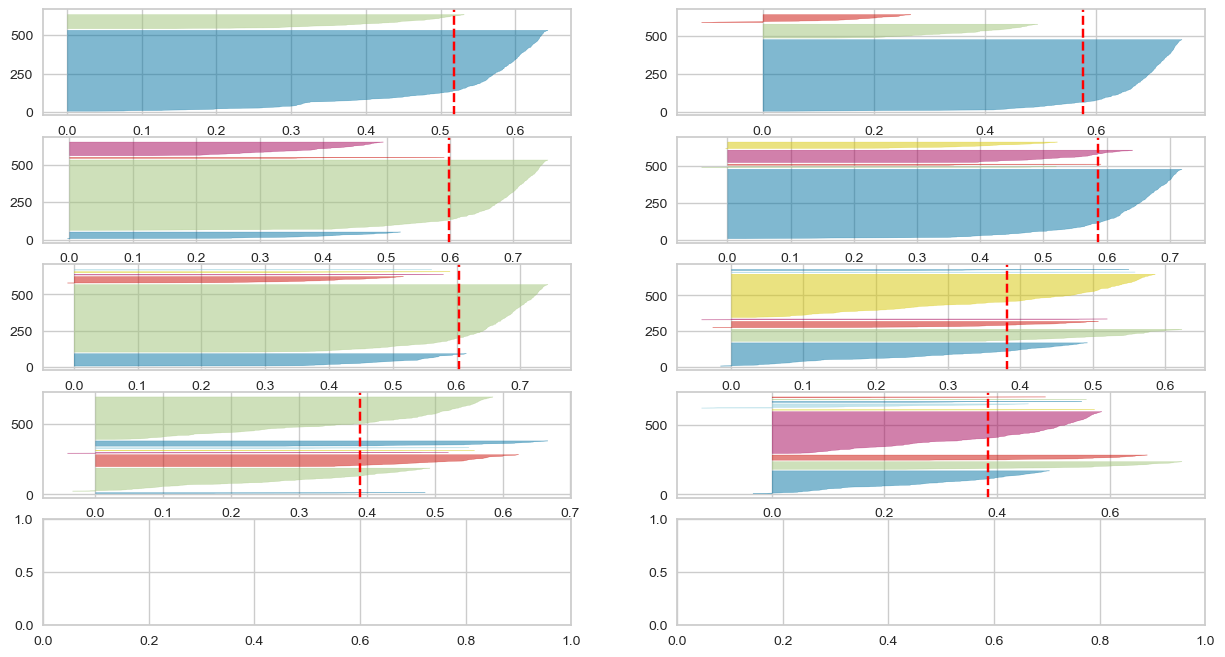

In [30]:
#https://towardsdatascience.com/elbow-method-is-not-sufficient-to-find-best-k-in-k-means-clustering-fc820da0631d 

import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score

fig, ax = plt.subplots(5, 2, figsize=(15,8))
silhouette_scores = {}
for i in [2, 3, 4, 5, 6, 7, 8, 9]:
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_to_cluster) 
    labels = km.labels_
    silhouette_scores[i] = silhouette_score(df_to_cluster, labels)

# Print silhouette scores for each number of clusters
avg_silhouette_score = silhouette_score(df_to_cluster, labels)
print(f'Average Silhouette Score: {avg_silhouette_score}')
for clusters, score in silhouette_scores.items():
    print(f'Silhouette Score for {clusters} clusters: {score}')


In [25]:
visualizer.silhouette_score_

0.3808753596828288